$$\large{\textbf{Телепортация квантовых состояний}}$$

$$ \textbf{Постановка задачи} $$

Телепортация  - это передача квантовой информации с использованием классического канала и запутывания. Телепортация есть пример использования запутывания как ресурса системы связи.

Далее рассматривается телепортация состояния одного кубита с использованием двух битов классической связи и одной запутанной пары (ЭПР - пары).

$$ \textit{Схема квантовой телепортации состояния кубита} $$

<img src="Fig13_1QC.png" />

In [150]:
# инициализация
from math import *  # модуль математики

import numpy as np
# импорт Qiskit
from qiskit import (
    QuantumCircuit,
    ClassicalRegister, QuantumRegister,
    execute,
    Aer)
from qiskit.visualization import (
    plot_bloch_multivector)

$ \textbf{Теоретические основы.} $

$ |\psi \rangle = \alpha_0 |0 \rangle + \alpha_1 |1 \rangle $

$ |\beta_{00}\rangle = \frac{1}{\sqrt{2}}[ |00 \rangle + |11 \rangle ]$

$ |\beta_{01}\rangle = \frac{1}{\sqrt{2}}[ |00 \rangle - |11 \rangle ]$

$ |\beta_{10}\rangle = \frac{1}{\sqrt{2}}[ |01 \rangle + |10 \rangle ]$

$ |\beta_{11}\rangle = \frac{1}{\sqrt{2}}[ |10 \rangle - |01 \rangle ]$

$ |\beta_{00}\rangle \otimes |\psi \rangle   = $
$[\alpha_0 |0 \rangle + \alpha_1 |1 \rangle] \otimes \frac{|\beta_{00}\rangle}{2}   +$$[\alpha_0 |0 \rangle - \alpha_1 |1 \rangle] \otimes \frac{|\beta_{01}\rangle}{2}  +$
$[\alpha_0 |1 \rangle + \alpha_1 |0 \rangle]  \otimes \frac{|\beta_{10}\rangle}{2}     +$$[\alpha_0 |1 \rangle - \alpha_1 |0 \rangle] \otimes \frac{|\beta_{11}\rangle}{2}   $





In [151]:
def create_bell_pair(qc, a, b):
    # создание белловских пар
    qc.h(a)  #  a в |+>
    qc.cx(a, b)  # CNOT


def alice_gates(qc, psi, a):
    # подготовка к измерению в базисе Белла
    qc.cx(psi, a)
    qc.h(psi)


def measure_and_send(qc, b0, b1):
    """ измеряем b0 & b1 и посылаем  Бобу"""
    qc.barrier()
    qc.measure(b0, 0)
    qc.measure(b1, 1)


def bob_gates(qc, qubit, crz, crx):
    #  c_if как контроль
    qc.x(qubit).c_if(crx, 1)  #
    qc.z(qubit).c_if(crz, 1)  #

In [152]:
teta = 7 * np.pi / 8
phi = -np.pi/2

psi = [np.cos(teta / 2), np.exp(1j * phi) * np.sin(teta / 2)]

a_psi = np.sqrt(np.sin(pi / 4))
b_psi = -np.sqrt(np.sin(3 * pi / 2)) * 1j

print(psi)

[0.1950903220161283, (6.005577771483278e-17-0.9807852804032304j)]


<ipython-input-152-f9489cbf0940>:7: RuntimeWarning: invalid value encountered in sqrt
  b_psi = -np.sqrt(np.sin(3 * pi / 2)) * 1j


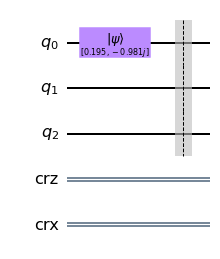

In [153]:
qr = QuantumRegister(3, name="q")  #  3 кубита
crz = ClassicalRegister(1, name="crz")  # 2 бита
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)
qc.initialize(psi, [0])  #инициализация кубита с состоянием для телепортации
qc.barrier()
qc.draw(output='mpl')

In [154]:
init_state = Aer.get_backend('statevector_simulator')
init_vector = execute(qc, init_state).result().get_statevector()
print(init_vector)

[1.95090322e-01+0.j         6.00557777e-17-0.98078528j
 0.00000000e+00+0.j         0.00000000e+00+0.j
 0.00000000e+00+0.j         0.00000000e+00+0.j
 0.00000000e+00+0.j         0.00000000e+00+0.j        ]


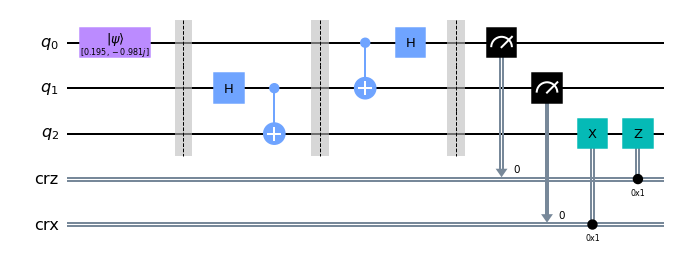

In [155]:
# протокол
# формирование пары
create_bell_pair(qc, 1, 2)
qc.barrier()

# делим пару и далее проводим измерение в базисе Белла 
alice_gates(qc, 0, 1)

# Алиса отправляет классические биты Бобу
measure_and_send(qc, 0, 1)

# Боб декодирует
bob_gates(qc, 2, crz, crx)
# схема
qc.draw(output='mpl')

[1.95090322e-01+0.j         6.00557777e-17-0.98078528j
 0.00000000e+00+0.j         0.00000000e+00+0.j
 0.00000000e+00+0.j         0.00000000e+00+0.j
 0.00000000e+00+0.j         0.00000000e+00+0.j        ]
[ 0.00000000e+00+0.j          1.95090322e-01+0.j
  0.00000000e+00+0.j          0.00000000e+00+0.j
 -0.00000000e+00+0.j         -6.00557777e-17-0.98078528j
 -0.00000000e+00+0.j         -0.00000000e+00+0.j        ]


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


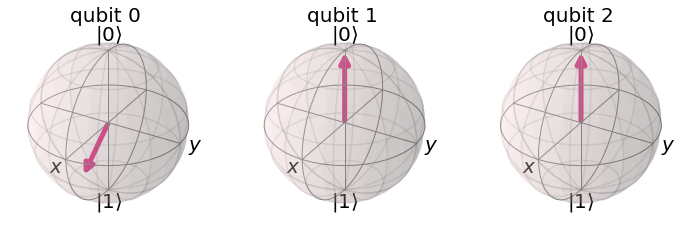

In [156]:
out_state = Aer.get_backend('statevector_simulator')
out_vector = execute(qc, out_state).result().get_statevector()
print(init_vector)
print(out_vector)
plot_bloch_multivector(init_vector)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


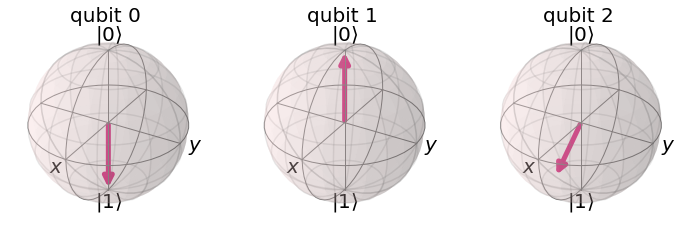

In [157]:
plot_bloch_multivector(out_vector)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


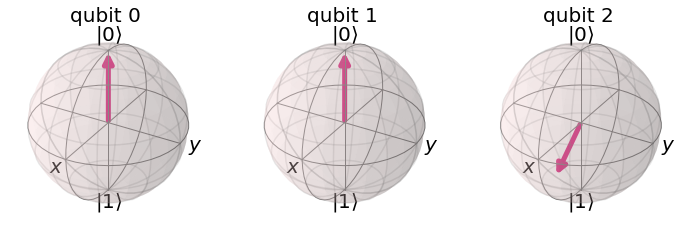

In [158]:
out_vector = execute(qc, out_state).result().get_statevector()
plot_bloch_multivector(out_vector)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


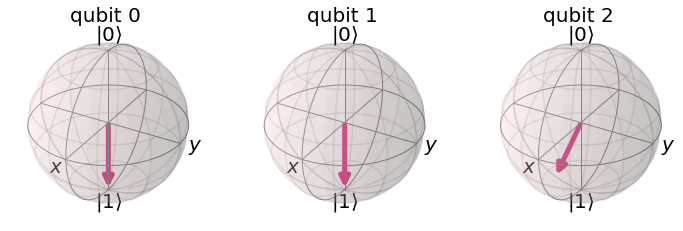

In [159]:
out_vector = execute(qc, out_state).result().get_statevector()
plot_bloch_multivector(out_vector)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


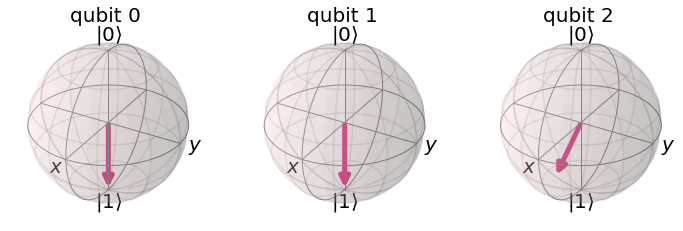

In [160]:
out_vector = execute(qc, out_state).result().get_statevector()
plot_bloch_multivector(out_vector)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


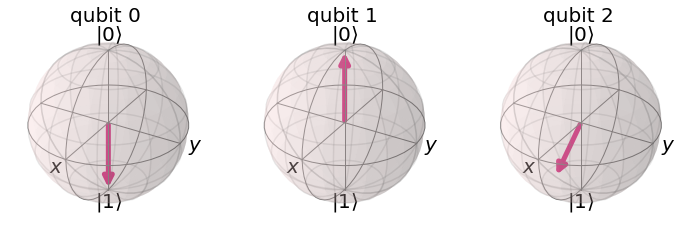

In [161]:
out_vector = execute(qc, out_state).result().get_statevector()
plot_bloch_multivector(out_vector)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


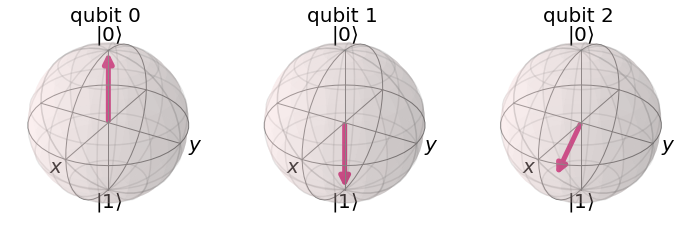

In [162]:
out_vector = execute(qc, out_state).result().get_statevector()
plot_bloch_multivector(out_vector)